# Working With Missing and Duplicate Data

In [1]:
import pandas as pd

- `Check for errors in data cleaning/transformation`
- Use data from additional sources to fill missing values
- Drop row/column
- Fill missing values with reasonable estimates computed from the available data

In [2]:
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

In [3]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [4]:
shape_2015, shape_2016, shape_2017

((164, 13), (164, 14), (164, 13))

In [5]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [6]:
happiness2015[happiness2015['Happiness Score'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [7]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [8]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [9]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [10]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [11]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

In [13]:
happiness2017.columns = happiness2017.columns.str.replace(".",' ').str.strip().str.replace('  ',' ').str.upper()

C:\Users\dell\AppData\Local\Temp/ipykernel_14232/3693490500.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2017.columns = happiness2017.columns.str.replace(".",' ').str.strip().str.replace('  ',' ').str.upper()


In [14]:
happiness2017.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [15]:
happiness2015.columns = happiness2015.columns.str.replace('(','').str.replace(')','').str.strip().str.upper()

C:\Users\dell\AppData\Local\Temp/ipykernel_14232/3458434633.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2015.columns = happiness2015.columns.str.replace('(','').str.replace(')','').str.strip().str.upper()


In [16]:
happiness2016.columns = happiness2016.columns.str.replace('(','').str.replace(')','').str.strip().str.upper()

C:\Users\dell\AppData\Local\Temp/ipykernel_14232/1949433483.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2016.columns = happiness2016.columns.str.replace('(','').str.replace(')','').str.strip().str.upper()


In [17]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True)

In [18]:
combined.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


In [19]:
missing = combined.isnull().sum()

In [20]:
combined.tail()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
491,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

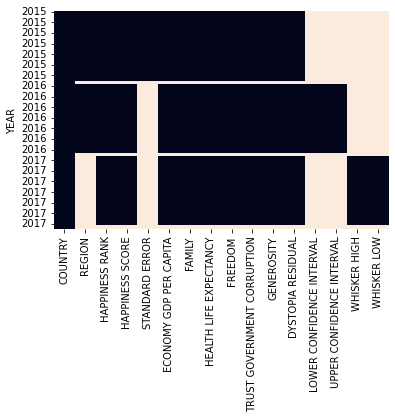

In [22]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(),cbar=False)
plt.show()

In [23]:
region_2017 = combined[combined['YEAR'] == 2017]['REGION']
missing = region_2017.isnull().sum()

In [24]:
missing

164

- Check for errors in data cleaning/transformation
- `Use data from additional sources to fill missing values`
- Drop row/column
- Fill missing values with reasonable estimates computed from the available data

Recall once more that each year contains the same countries. Since the regions are fixed values - the region a country was assigned to in 2015 and 2016 won't change

In [25]:
happiness2015['COUNTRY'].isin(happiness2016['COUNTRY']).sum()

164

In [26]:
regions = pd.read_csv('region.csv')
regions.shape

(164, 2)

In [27]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [28]:
combined = pd.merge(left=combined, right = regions, on='COUNTRY',how = 'left')

In [29]:
combined.columns

Index(['COUNTRY', 'REGION_x', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR', 'LOWER CONFIDENCE INTERVAL',
       'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW', 'REGION_y'],
      dtype='object')

In [30]:
combined[['REGION_x','REGION_y']]

,REGION_x,REGION_y
0,Western Europe,Western Europe
1,Western Europe,Western Europe
2,Western Europe,Western Europe
3,Western Europe,Western Europe
4,North America,North America
...,...,...
487,NaN,Latin America and Caribbean
488,NaN,Sub-Saharan Africa
489,NaN,Sub-Saharan Africa
490,NaN,Latin America and Caribbean


In [31]:
combined.isnull().sum()

COUNTRY                          0
REGION_x                       177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION_y                         0
dtype: int64

In [32]:
combined = combined.drop('REGION_x',axis=1)

In [33]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION_y                         0
dtype: int64

In [34]:
combined.rename({'REGION_y':'REGION'}, axis=1,inplace=True)

In [35]:
combined.head()

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America


In [36]:
regions_columns = combined.iloc[:,-1]

In [37]:
combined.pop('REGION')

0                   Western Europe
1                   Western Europe
2                   Western Europe
3                   Western Europe
4                    North America
                  ...             
487    Latin America and Caribbean
488             Sub-Saharan Africa
489             Sub-Saharan Africa
490    Latin America and Caribbean
491             Sub-Saharan Africa
Name: REGION, Length: 492, dtype: object

In [38]:
combined.insert(1, regions_columns.name, regions_columns)

In [39]:
combined

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,Latin America and Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
488,Somaliland Region,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,Somaliland region,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
490,Suriname,Latin America and Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


# duplicated()

In [40]:
combined[combined.duplicated()]

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW


In [41]:
combined[combined.duplicated(["COUNTRY",'YEAR'])]

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW


Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year

'India' AND  'INDIA'

In [42]:
combined['COUNTRY'] = combined["COUNTRY"].str.upper()

In [43]:
combined[combined.duplicated(["COUNTRY",'YEAR'])]

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
162,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN
326,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN
489,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


In [44]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
90,SOMALILAND REGION,Sub-Saharan Africa,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN
162,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN
260,SOMALILAND REGION,Sub-Saharan Africa,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN
326,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN
488,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


# drop_duplicates()

In [45]:
combined = combined.drop_duplicates(['COUNTRY','YEAR'])

In [46]:
combined.shape

(489, 17)

In [47]:
combined[combined.duplicated(["COUNTRY",'YEAR'])]

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW


In [48]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
90,SOMALILAND REGION,Sub-Saharan Africa,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN
260,SOMALILAND REGION,Sub-Saharan Africa,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN
488,SOMALILAND REGION,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


- Check for errors in data cleaning/transformation
- Use data from additional sources to fill missing values
- `Drop row/column`
- Fill missing values with reasonable estimates computed from the available data

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we will drop them.

- STANDARD ERROR
- LOWER CONFIDENCE INTERVAL
- UPPER CONFIDENCE INTERVAL
- WHISKER HIGH
- WHISKER LOW

In [49]:
# columns_to_drop = ['STANDARD ERROR','LOWER CONFIDENCE INTERVAL','UPPER CONFIDENCE INTERVAL','WHISKER HIGH','WHISKER LOW']

# combined = combined.drop(columns_to_drop, axis=1)

# dropna()

In [50]:
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
UPPER CONFIDENCE INTERVAL      157
LOWER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
DYSTOPIA RESIDUAL              470
GENEROSITY                     470
TRUST GOVERNMENT CORRUPTION    470
FREEDOM                        470
FAMILY                         470
ECONOMY GDP PER CAPITA         470
HAPPINESS SCORE                470
HAPPINESS RANK                 470
HEALTH LIFE EXPECTANCY         470
YEAR                           489
REGION                         489
COUNTRY                        489
dtype: int64

In [51]:
combined.dropna(thresh=159, axis = 1).head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,SWITZERLAND,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,ICELAND,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,DENMARK,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,NORWAY,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,CANADA,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [52]:
combined  = combined.dropna(thresh=159, axis = 1)
combined.isnull().sum()

COUNTRY                         0
REGION                          0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
dtype: int64

In [53]:
combined.set_index("REGION").sort_values(['REGION','HAPPINESS SCORE']).head()

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
REGION,,,,,,,,,,,
Australia and New Zealand,AUSTRALIA,10.0,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,2.065211,2017
Australia and New Zealand,AUSTRALIA,10.0,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,2015
Australia and New Zealand,NEW ZEALAND,9.0,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,2015
Australia and New Zealand,AUSTRALIA,9.0,7.313,1.444430,1.104760,0.851200,0.568370,0.323310,0.474070,2.546500,2016
Australia and New Zealand,NEW ZEALAND,8.0,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2.046456,2017


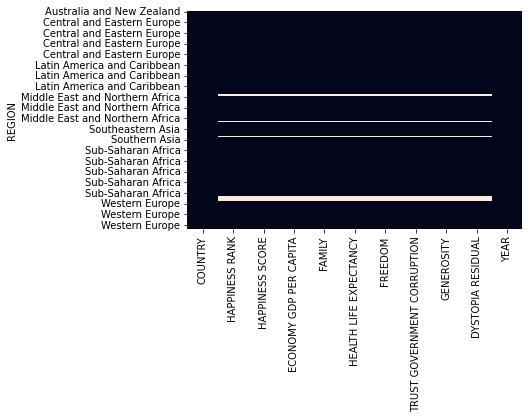

In [54]:
sorted_combined = combined.set_index("REGION").sort_values(['REGION','HAPPINESS SCORE'])
sns.heatmap(sorted_combined.isnull(), cbar=False)
plt.show()

In [55]:
combined.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,SWITZERLAND,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,ICELAND,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,DENMARK,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,NORWAY,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,CANADA,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


# fillna()

- Check for errors in data cleaning/transformation
- Use data from additional sources to fill missing values
- Drop row/column
- `Fill missing values with reasonable estimates computed from the available data`

In [56]:
(6+7+8+9+75)/5

21.0

In [57]:
(6+7+8+9+75+21)/6

21.0

In [58]:
combined['HAPPINESS SCORE'].mean()

5.370727659882893

In [59]:
score_mean = combined['HAPPINESS SCORE'].mean()

In [60]:
combined['HAPPINESS SCORE'] = combined['HAPPINESS SCORE'].fillna(score_mean)

In [61]:
combined['HAPPINESS SCORE'].mean()

5.370727659882894

In [62]:
combined.isnull().sum()

COUNTRY                         0
REGION                          0
HAPPINESS RANK                 19
HAPPINESS SCORE                 0
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
dtype: int64

# Task

- `Fill all other remaining columns with mean.`
- FOR HAPPINESS RANKING, since this is an ordinal value, find out how can you fill the null values in an ordinal/rank/positional value.

In [63]:
combined['ECONOMY GDP PER CAPITA'].mean()

0.9278300665993268

In [64]:
combined.columns[3:11]

Index(['HAPPINESS SCORE', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL'],
      dtype='object')

In [65]:
counter = 0
column_name = combined.columns[3:11]
for i in column_name:
    counter += 1
    mean = str(combined[i].mean())
    mean_list = mean.split()
    for j in mean_list:
        combined[i] = combined[i].fillna(float(j))
        print(combined[i])

0      7.587000
1      7.561000
2      7.527000
3      7.522000
4      7.427000
         ...   
486    5.370728
487    5.370728
488    5.370728
490    5.370728
491    5.370728
Name: HAPPINESS SCORE, Length: 489, dtype: float64
0      1.39651
1      1.30232
2      1.32548
3      1.45900
4      1.32629
        ...   
486    0.92783
487    0.92783
488    0.92783
490    0.92783
491    0.92783
Name: ECONOMY GDP PER CAPITA, Length: 489, dtype: float64
0      1.349510
1      1.402230
2      1.360580
3      1.330950
4      1.322610
         ...   
486    0.990347
487    0.990347
488    0.990347
490    0.990347
491    0.990347
Name: FAMILY, Length: 489, dtype: float64
0      0.941430
1      0.947840
2      0.874640
3      0.885210
4      0.905630
         ...   
486    0.579968
487    0.579968
488    0.579968
490    0.579968
491    0.579968
Name: HEALTH LIFE EXPECTANCY, Length: 489, dtype: float64
0      0.665570
1      0.628770
2      0.649380
3      0.669730
4      0.632970
         ...   
48

In [66]:
combined.isnull().sum()

COUNTRY                         0
REGION                          0
HAPPINESS RANK                 19
HAPPINESS SCORE                 0
ECONOMY GDP PER CAPITA          0
FAMILY                          0
HEALTH LIFE EXPECTANCY          0
FREEDOM                         0
TRUST GOVERNMENT CORRUPTION     0
GENEROSITY                      0
DYSTOPIA RESIDUAL               0
YEAR                            0
dtype: int64

- Fill all other remaining columns with mean.
- `FOR HAPPINESS RANKING, since this is an ordinal value, find out how can you fill the null values in an ordinal/rank/positional value.`

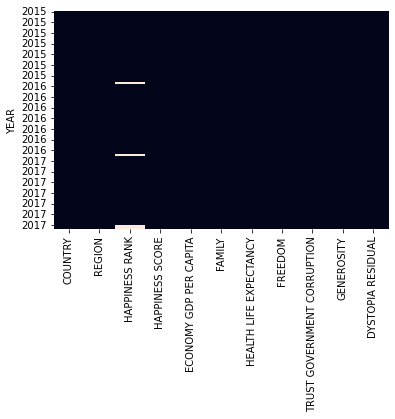

In [67]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(),cbar=False)
plt.show()

In [68]:
year2015 = combined[combined['YEAR'] == 2015]
year2016 = combined[combined['YEAR'] == 2016]
year2017 = combined[combined['YEAR'] == 2017]

In [69]:
filled_2015 = year2015['HAPPINESS RANK'].interpolate(method='linear')
filled_2016 = year2016['HAPPINESS RANK'].interpolate(method='linear')
filled_2017 = year2017['HAPPINESS RANK'].interpolate(method='linear')

In [70]:
combined.loc[158:163, 'HAPPINESS RANK'] = filled_2015.loc[158:]
combined.loc[321:327, 'HAPPINESS RANK'] = filled_2016.loc[321:]
combined.loc[482:490, 'HAPPINESS RANK'] = filled_2017.loc[482:]

In [71]:
combined['HAPPINESS RANK'] = combined['HAPPINESS RANK'].interpolate(method = 'linear')

In [72]:
combined['HAPPINESS RANK'].isnull().sum()

0

In [73]:
combined.to_csv( 'Cleaning_updated.csv', index=False)